In [11]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget
from sklearn.datasets import make_blobs
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
np.set_printoptions(precision=2)
from lab_utils_multiclass_TF import *
import logging
logging.getLogger("tensorflow").setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

In [12]:
# visualize the data
# making 4 class dataset for classification 
classes= 4
m=100
centers=[[-5, 2], [-2, -2], [1, 2], [5, -2]]
std=1.0
X_train,y_train=make_blobs(n_samples=m,centers=centers,cluster_std=std,random_state=30)

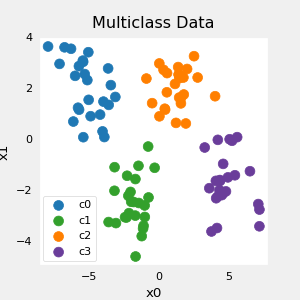

In [21]:
plt_mc(X_train,y_train,classes,centers,std=std)

In [14]:
# show classes in data set
print(f"unique classes {np.unique(y_train)}")
# show how classes are represented
print(f"class representation {y_train[:10]}")
# show shapes of our dataset
print(f"shape of X_train: {X_train.shape}, shape of y_train: {y_train.shape}")

unique classes [0 1 2 3]
class representation [3 3 3 0 3 3 3 3 2 0]
shape of X_train: (100, 2), shape of y_train: (100,)


In [22]:
tf.random.set_seed(1234) # to achieve consistent result
model=Sequential(
    [
        Dense(2,activation='relu' ,name="L1"),
        Dense(4,activation='sigmoid' ,name="L2")
    ]
)

In [23]:
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=tf.keras.optimizers.Adam(0.01)
)
model.fit(
    X_train,y_train,
    epochs=200
)

Epoch 1/200


/home/nathanael/Desktop/deep/.venv/lib/python3.12/site-packages/keras/src/backend/tensorflow/nn.py:599: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 1.8123  
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.5651 
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.3849 
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.2586 
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1787 
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.1290 
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0957 
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0708 
Epoch 9/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0504 
Epoch 10/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0328 
Epoch 11/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 1.0170 
Epoch 12/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 1.0026 
Epoch 13/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9893 
Epoch 14/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9769 
Epoch 15/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.9654 
Epoch 16/200
4/4 ━━━━━━━━━━━━━

With the model trained, we can see how the model has classified the training data.

184/184 ━━━━━━━━━━━━━━━━━━━━ 0s 691us/step


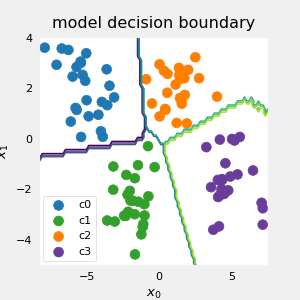

In [24]:
plt_cat_mc(X_train, y_train, model, classes)

In [25]:
# gather the trained parameters from the first layer
l1=model.get_layer("L1")
W1,b1=l1.get_weights()
W1,b1,X_train


(array([[-0.26,  1.86],
        [ 2.62,  0.9 ]], dtype=float32),
 array([1.11, 2.08], dtype=float32),
 array([[ 4.33e+00, -1.99e+00],
        [ 4.10e+00, -2.31e+00],
        [ 4.50e+00, -2.19e+00],
        [-5.40e+00,  3.02e+00],
        [ 4.22e+00, -3.10e-02],
        [ 3.76e+00, -3.61e+00],
        [ 7.19e+00, -2.76e+00],
        [ 5.44e+00, -1.41e+00],
        [ 1.60e+00,  1.63e+00],
        [-5.03e+00,  3.39e+00],
        [ 1.23e+00,  6.32e-01],
        [-1.22e+00, -3.79e+00],
        [-3.06e+00, -3.28e+00],
        [-1.68e+00, -2.99e+00],
        [-3.57e+00,  1.34e+00],
        [ 4.60e+00, -9.70e-01],
        [ 3.83e-02,  2.95e+00],
        [ 4.16e+00, -3.48e+00],
        [-7.32e-01, -2.28e+00],
        [ 5.90e-01,  2.58e+00],
        [ 4.08e+00, -1.63e+00],
        [-5.29e+00,  2.54e+00],
        [-3.16e+00, -2.02e+00],
        [ 1.93e+00,  6.09e-01],
        [ 1.47e+00,  2.38e+00],
        [-3.62e+00,  2.76e+00],
        [ 5.06e+00, -6.77e-03],
        [-2.26e+00, -1.43e+00],
  

plotting the function of the first layer

/home/nathanael/Desktop/deep/tensor/regerssion and classification/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/nathanael/Desktop/deep/tensor/regerssion and classification/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


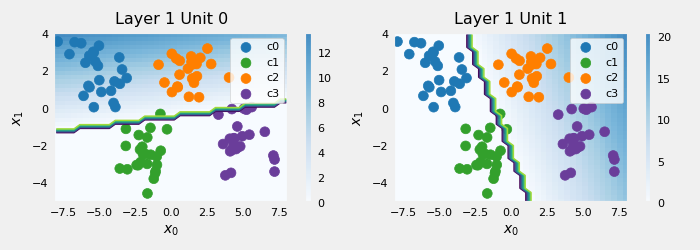

In [26]:
plt_layer_relu(X_train,y_train.reshape(-1,),W1,b1,classes)

/home/nathanael/Desktop/deep/tensor/regerssion and classification/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/nathanael/Desktop/deep/tensor/regerssion and classification/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/nathanael/Desktop/deep/tensor/regerssion and classification/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,
/home/nathanael/Desktop/deep/tensor/regerssion and classification/lab_utils_multiclass_TF.py:63: UserWarning: No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored
  ax.scatter(X[idx, 0], X[idx, 1],  marker=m,


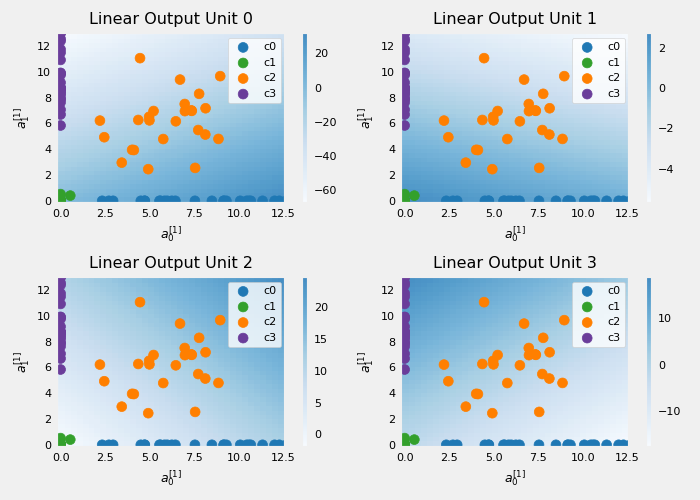

In [27]:
# gather the trained parameters from the second layer
l2=model.get_layer("L2")
W2,b2=l2.get_weights()

# create the 'new features', the training examples after L1 transformation
Xl2 = np.maximum(0, np.dot(X_train,W1) + b1)  # this is the relu max(0,z)

plt_output_layer_linear(Xl2, y_train.reshape(-1,), W2, b2, classes,
                        x0_rng = (-0.25,np.amax(Xl2[:,0])), x1_rng = (-0.25,np.amax(Xl2[:,1])))